<a href="https://colab.research.google.com/github/Jonathan-Aponte/portfolio/blob/main/Football_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
  <h1><strong>Precision on the Pitch: Argentina’s Qatar World Cup Final Passing Analysis</h1>
</div>

by Jonathan Aponte

Contact: jonathan.amaury@gmail.com

**In today's world**, **DATA-DRIVEN DECISION-MAKING** HAS BECOME AN ESSENTIAL PART OF ALL ASPECTS OF SPORTS AND BUSINESS. That's why this analysis aims to provide an **in-depth view of the passes performance** of the Argentine national team during the **final match of the 2022 FIFA World Cup**, where they faced the French national team.

# Loading Libraries

In [130]:
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

In [131]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch, VerticalPitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extract (E)

## Obtaining the Competition ID

In [132]:
competiciones=sb.competitions()

In [133]:
competiciones

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


The competition ID, which is 43, and the season, which is 106, are selected.

In [134]:
#All World Cup matches are loaded into the variable 'WC_matches'
WC_matches=pd.DataFrame(sb.matches(competition_id=43, season_id=106))
WC_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,18:00:00.000,International - FIFA World Cup,2022,Mexico,Poland,0,0,available,...,2023-04-27T00:49:30.005344,1,Group Stage,Stadium 974,Chris Beath,Gerardo Daniel Martino,Czesław Michniewicz,1.1.0,2,2
60,3857262,2022-12-02,17:00:00.000,International - FIFA World Cup,2022,South Korea,Portugal,2,1,available,...,2023-04-26T23:48:08.999798,3,Group Stage,Education City Stadium,Facundo Tello Figueroa,Paulo Jorge Gomes Bento,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
61,3857261,2022-11-29,21:00:00.000,International - FIFA World Cup,2022,Wales,England,0,3,available,...,2023-04-27T00:02:44.241621,3,Group Stage,Ahmad bin Ali Stadium,Slavko Vinčić,Robert Page,Gareth Southgate,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2023-04-26T23:51:48.352990,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [135]:
# Id of the game we are analizing
id_study=3869685

## Obtaining Players from Argentina in the World Cup

In [136]:
# Data from the match
Arg_Fra=sb.events(match_id=	id_study)

In [137]:
# The data of the players called up by Argentina in the Qatar World Cup is stored
team_Arg=sb.lineups(match_id=id_study)["Argentina"]
team_Arg[['player_id',	'player_name',	'player_nickname',	'jersey_number']]

,player_id,player_name,player_nickname,jersey_number
0,2995,Ángel Fabián Di María Hernández,Ángel Di María,11
1,3090,Nicolás Hernán Otamendi,Nicolás Otamendi,19
2,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10
3,5507,Nicolás Alejandro Tagliafico,Nicolás Tagliafico,3
4,5743,Paulo Bruno Exequiel Dybala,Paulo Dybala,21
5,6312,Franco Armani,None,1
6,6377,Ángel Martín Correa,Ángel Correa,15
7,6694,Gerónimo Rulli,Gero Rulli,12
8,6909,Damián Emiliano Martínez,Emiliano Martínez,23
9,7006,Alejandro Darío Gómez,Papu Gómez,17


# Transform (T)

## Matches Argentina

In [138]:
#Selects Argentina's matches in the World Cup and chooses the variables needed for use
argentina_matches=WC_matches[(WC_matches['home_team']=='Argentina')|(WC_matches['away_team']=='Argentina')]
argentina_matches=argentina_matches[['match_id','match_date', 'kick_off','season','home_team', 'away_team', 'home_score', 'away_score','stadium', 'referee', 'home_managers',
       'away_managers']]

argentina_matches

,match_id,match_date,kick_off,season,home_team,away_team,home_score,away_score,stadium,referee,home_managers,away_managers
1,3869151,2022-12-03,21:00:00.000,2022,Argentina,Australia,2,1,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold
6,3869321,2022-12-09,21:00:00.000,2022,Netherlands,Argentina,2,2,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni
9,3869685,2022-12-18,17:00:00.000,2022,Argentina,France,3,3,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps
11,3857264,2022-11-30,21:00:00.000,2022,Poland,Argentina,0,2,Stadium 974,Danny Desmond Makkelie,Czesław Michniewicz,Lionel Sebastián Scaloni
13,3857289,2022-11-26,21:00:00.000,2022,Argentina,Mexico,2,0,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino
19,3869519,2022-12-13,21:00:00.000,2022,Argentina,Croatia,3,0,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić
37,3857300,2022-11-22,12:00:00.000,2022,Argentina,Saudi Arabia,1,2,Lusail Stadium,Slavko Vinčić,Lionel Sebastián Scaloni,Hervé Renard


## Passes of Argentina in the match

The match events are stored in Arg_Fra, with one of its key features being the play type. For the analysis at hand, only plays categorized as 'Pass' are of significance.

In [139]:
passes=Arg_Fra[Arg_Fra['type']=='Pass']

In [140]:
#the 'location' variable, which contains the coordinates of where the pass was made, is split into two columns, X and Y.
passes[['x','y']]=passes['location'].apply(pd.Series)

<ipython-input-140-8e60d542b820>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes[['x','y']]=passes['location'].apply(pd.Series)
<ipython-input-140-8e60d542b820>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes[['x','y']]=passes['location'].apply(pd.Series)


In [141]:
# To complement the data, the 'pass_end_location' variable, which contains the coordinates where the pass ends, is split into two columns, X_end and Y_end.
passes[['x_end','y_end']]=passes['pass_end_location'].apply(pd.Series)

<ipython-input-141-af2672cf12c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes[['x_end','y_end']]=passes['pass_end_location'].apply(pd.Series)
<ipython-input-141-af2672cf12c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes[['x_end','y_end']]=passes['pass_end_location'].apply(pd.Series)


In [142]:
passes[['player_id', 'player','x', 'y','x_end','y_end']].head()

,player_id,player,x,y,x_end,y_end
12,5487.0,Antoine Griezmann,61.0,40.1,48.0,43.2
13,10481.0,Aurélien Djani Tchouaméni,49.7,43.6,96.0,1.8
14,29201.0,Nahuel Molina Lucero,22.7,80.0,36.0,75.2
15,7797.0,Rodrigo Javier De Paul,41.1,73.9,23.2,62.8
16,20572.0,Cristian Gabriel Romero,24.7,59.4,21.5,32.2


In [143]:
# The data is filtered to obtain only the passes made by Argentina
passes_Arg=passes[passes['team']=="Argentina"]


In [144]:
# We modify the player names, as they are stored with full names.
passes_Arg['player']=passes_Arg['player'].replace(['Nahuel Molina Lucero'],'N Molina')
passes_Arg['player']=passes_Arg['player'].replace(['Rodrigo Javier De Paul'],'De Paul')
passes_Arg['player']=passes_Arg['player'].replace(['Cristian Gabriel Romero'],'Cuti Romero')
passes_Arg['player']=passes_Arg['player'].replace(['Nicolás Hernán Otamendi'],'Otamendi')
passes_Arg['player']=passes_Arg['player'].replace(['Nicolás Alejandro Tagliafico'],'Tagliafico')
passes_Arg['player']=passes_Arg['player'].replace(['Damián Emiliano Martínez'],'Dibu')
passes_Arg['player']=passes_Arg['player'].replace(['Alexis Mac Allister'],'Mac Allister')
passes_Arg['player']=passes_Arg['player'].replace(['Lionel Andrés Messi Cuccittini'],'Leo Messi')
passes_Arg['player']=passes_Arg['player'].replace(['Ángel Fabián Di María Hernández'],'Di María')
passes_Arg['player']=passes_Arg['player'].replace(['Enzo Fernandez'],'Enzo')
passes_Arg['player']=passes_Arg['player'].replace(['Julián Álvarez'],'Álvarez')
passes_Arg['player']=passes_Arg['player'].replace(['Marcos Javier Acuña'],'Acuña')
passes_Arg['player']=passes_Arg['player'].replace(['Gonzalo Ariel Montiel'],'Montiel')
passes_Arg['player']=passes_Arg['player'].replace(['Leandro Daniel Paredes'],'Paredes')
passes_Arg['player']=passes_Arg['player'].replace(['Lautaro Javier Martínez'],'Lautaro')
passes_Arg['player']=passes_Arg['player'].replace(['Paulo Bruno Exequiel Dybala'],'Dybala')
passes_Arg['player']=passes_Arg['player'].replace(['Germán Alejandro Pezzella'],'Pezzella')

<ipython-input-144-2c63e87db332>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_Arg['player']=passes_Arg['player'].replace(['Nahuel Molina Lucero'],'N Molina')
<ipython-input-144-2c63e87db332>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_Arg['player']=passes_Arg['player'].replace(['Rodrigo Javier De Paul'],'De Paul')
<ipython-input-144-2c63e87db332>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [145]:
# We record the number of passes made by the Argentina players during the match.
passes_Arg_total=passes_Arg.groupby(['player' ])['player'].count().to_frame()
passes_Arg_id=passes_Arg.groupby(['player_id', 'player' ])['player'].count().to_frame()
passes_Arg_id.rename(columns={'player': 'total_pass'}, inplace=True)
passes_Arg_id.reset_index(inplace=True)

In [146]:
passes_Arg_id

,player_id,player,total_pass
0,2995.0,Di María,29
1,3090.0,Otamendi,75
2,5503.0,Leo Messi,60
3,5507.0,Tagliafico,56
4,5743.0,Dybala,3
5,6909.0,Dibu,33
6,7161.0,Pezzella,1
7,7797.0,De Paul,68
8,11456.0,Lautaro,7
9,16308.0,Paredes,15


The variable "passes_Arg['pass_outcome']" contains the category that helps us understand whether the passes made by a player were successful or not. This variable has five types of outcomes: NaN for successful passes, Incomplete for unsuccessful or incomplete passes, Unknown for data that the camera couldn't detect due to its angle, and Out for passes that ended outside the field of play

In [147]:
passes_Arg['pass_outcome'].unique()

array([nan, 'Incomplete', 'Pass Offside', 'Unknown', 'Out'], dtype=object)

In [148]:
# Filter for completed passes and unsuccessful passes in the dataset.
complete=passes_Arg[passes_Arg['pass_outcome'].isnull()]
incomplete=passes_Arg[passes_Arg['pass_outcome'].notnull()]

In [149]:
# Passes, both successful and unsuccessful, are grouped by each player and added to the dataframe.
passes_Arg_total['Complete']=complete.groupby(['player'])['player'].count().to_frame()
passes_Arg_total['Incomplete']=incomplete.groupby(['player'])['player'].count().to_frame()
passes_Arg_total=passes_Arg_total.fillna(0)
passes_Arg_total=passes_Arg_total.rename(columns={'player': 'Total'}).reset_index()
passes_Arg_total

,player,Total,Complete,Incomplete
0,Acuña,28,19,9.0
1,Cuti Romero,71,60,11.0
2,De Paul,68,57,11.0
3,Di María,29,25,4.0
4,Dibu,33,18,15.0
5,Dybala,3,1,2.0
6,Enzo,94,79,15.0
7,Lautaro,7,5,2.0
8,Leo Messi,60,49,11.0
9,Mac Allister,52,45,7.0


In [150]:
# The players' IDs are added to the dataframe
df_data_pass = pd.merge(passes_Arg_total, passes_Arg_id, on='player')
df_data_pass

,player,Total,Complete,Incomplete,player_id,total_pass
0,Acuña,28,19,9.0,19597.0,28
1,Cuti Romero,71,60,11.0,20572.0,71
2,De Paul,68,57,11.0,7797.0,68
3,Di María,29,25,4.0,2995.0,29
4,Dibu,33,18,15.0,6909.0,33
5,Dybala,3,1,2.0,5743.0,3
6,Enzo,94,79,15.0,38718.0,94
7,Lautaro,7,5,2.0,11456.0,7
8,Leo Messi,60,49,11.0,5503.0,60
9,Mac Allister,52,45,7.0,27886.0,52


## Players of Argentina in the world cup

 The names of the players who participated in the Argentina World Cup are updated.
>



In [151]:
#team_Arg is an API call to StatsBomb that contains data for all the players called up by Argentina for the World Cup.
team_Arg['player_name']=team_Arg['player_name'].replace(['Nahuel Molina Lucero'],'N Molina')
team_Arg['player_name']=team_Arg['player_name'].replace(['Rodrigo Javier De Paul'],'De Paul')
team_Arg['player_name']=team_Arg['player_name'].replace(['Cristian Gabriel Romero'],'Cuti Romero')
team_Arg['player_name']=team_Arg['player_name'].replace(['Nicolás Hernán Otamendi'],'N. Otamendi')
team_Arg['player_name']=team_Arg['player_name'].replace(['Nicolás Alejandro Tagliafico'],'N. Tagliafico')
team_Arg['player_name']=team_Arg['player_name'].replace(['Damián Emiliano Martínez'],'Dibu M.')
team_Arg['player_name']=team_Arg['player_name'].replace(['Alexis Mac Allister'],'Mac Allister')
team_Arg['player_name']=team_Arg['player_name'].replace(['Lionel Andrés Messi Cuccittini'],'Leo Messi')
team_Arg['player_name']=team_Arg['player_name'].replace(['Ángel Fabián Di María Hernández'],'Di María')
team_Arg['player_name']=team_Arg['player_name'].replace(['Enzo Fernandez'],'Enzo F.')
team_Arg['player_name']=team_Arg['player_name'].replace(['Julián Álvarez'],'J. Álvarez')
team_Arg['player_name']=team_Arg['player_name'].replace(['Marcos Javier Acuña'],'M. Acuña')
team_Arg['player_name']=team_Arg['player_name'].replace(['Gonzalo Ariel Montiel'],'G. Montiel')
team_Arg['player_name']=team_Arg['player_name'].replace(['Leandro Daniel Paredes'],'L. Paredes')
team_Arg['player_name']=team_Arg['player_name'].replace(['Paulo Bruno Exequiel Dybala'],'P. Dybala')
team_Arg['player_name']=team_Arg['player_name'].replace(['Germán Alejandro Pezzella'],'G. Pezzella')
team_Arg['player_name']=team_Arg['player_name'].replace(['Franco Armani'],'F. Armani')
team_Arg['player_name']=team_Arg['player_name'].replace(['Ángel Martín Correa'],'A. Correa')
team_Arg['player_name']=team_Arg['player_name'].replace(['Gerónimo Rulli'],'G. Rulli')
team_Arg['player_name']=team_Arg['player_name'].replace(['Alejandro Darío Gómez'],'Papu G.')
team_Arg['player_name']=team_Arg['player_name'].replace(['Lautaro Javier Martínez'],'Lautaro M.')
team_Arg['player_name']=team_Arg['player_name'].replace(['Juan Marcos Foyth'],'J. Foyth')
team_Arg['player_name']=team_Arg['player_name'].replace(['Exequiel Alejandro Palacios'],'E. Palacios')
team_Arg['player_name']=team_Arg['player_name'].replace(['Thiago Ezequiel Almada'],'T. Almada')



In [152]:
team_Arg.head()

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2995,Di María,Ángel Di María,11,Argentina,[],"[{'position_id': 21, 'position': 'Left Wing', ..."
1,3090,N. Otamendi,Nicolás Otamendi,19,Argentina,[],"[{'position_id': 5, 'position': 'Left Center B..."
2,5503,Leo Messi,Lionel Messi,10,Argentina,[],"[{'position_id': 17, 'position': 'Right Wing',..."
3,5507,N. Tagliafico,Nicolás Tagliafico,3,Argentina,[],"[{'position_id': 6, 'position': 'Left Back', '..."
4,5743,P. Dybala,Paulo Dybala,21,Argentina,[],"[{'position_id': 8, 'position': 'Left Wing Bac..."


In [153]:
# From the 'positions' column, we extract necessary data for the study, such as position, whether the player was a starter...
#Create an empty list to store data for the new dataset
new_data = []

# Iterate through the rows of the original dataset.
for index, row in team_Arg.iterrows():
    player_id = row['player_id']
    player_name = row['player_name']
    positions = row['positions']

    # Iterate through the player's positions and add them to the new dataset.
    for position_data in positions:
        new_row = {'player_id': player_id, 'player_name': player_name}
        new_row.update(position_data)
        new_data.append(new_row)

# Create a new DataFrame with the position data.
data_team = pd.DataFrame(new_data)

data_team.head()



,player_id,player_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
0,2995,Di María,21,Left Wing,00:00,63:51,1,2.0,Starting XI,Substitution - Off (Tactical)
1,3090,N. Otamendi,5,Left Center Back,00:00,None,1,NaN,Starting XI,Final Whistle
2,5503,Leo Messi,17,Right Wing,00:00,115:32,1,4.0,Starting XI,Tactical Shift
3,5503,Leo Messi,22,Right Center Forward,115:32,28:11,4,1.0,Tactical Shift,Player Off
4,5503,Leo Messi,17,Right Wing,28:19,None,1,NaN,Player On,Final Whistle


## Starting lineup

In [154]:
# filtering to obtain Argentina's starting players."
XI_start= data_team[data_team['start_reason']=='Starting XI']
XI_start

,player_id,player_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
0,2995,Di María,21,Left Wing,00:00,63:51,1,2.0,Starting XI,Substitution - Off (Tactical)
1,3090,N. Otamendi,5,Left Center Back,00:00,None,1,NaN,Starting XI,Final Whistle
2,5503,Leo Messi,17,Right Wing,00:00,115:32,1,4.0,Starting XI,Tactical Shift
5,5507,N. Tagliafico,6,Left Back,00:00,115:32,1,4.0,Starting XI,Tactical Shift
9,6909,Dibu M.,1,Goalkeeper,00:00,None,1,NaN,Starting XI,Final Whistle
12,7797,De Paul,13,Right Center Midfield,00:00,101:37,1,3.0,Starting XI,Substitution - Off (Tactical)
21,20572,Cuti Romero,3,Right Center Back,00:00,None,1,NaN,Starting XI,Final Whistle
22,27886,Mac Allister,15,Left Center Midfield,00:00,115:22,1,4.0,Starting XI,Substitution - Off (Tactical)
26,29201,N Molina,2,Right Back,00:00,90:00,1,3.0,Starting XI,Substitution - Off (Tactical)
27,29560,J. Álvarez,23,Center Forward,00:00,101:49,1,3.0,Starting XI,Substitution - Off (Tactical)


## Final lineup

In [155]:
# "Filtering is done to obtain the players who completed the match."
XI_final= data_team[data_team['end_reason']=='Final Whistle']
XI_final

,player_id,player_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
1,3090,N. Otamendi,5,Left Center Back,00:00,None,1,NaN,Starting XI,Final Whistle
4,5503,Leo Messi,17,Right Wing,28:19,None,1,NaN,Player On,Final Whistle
8,5743,P. Dybala,15,Left Center Midfield,120:48,None,4,NaN,Tactical Shift,Final Whistle
9,6909,Dibu M.,1,Goalkeeper,00:00,None,1,NaN,Starting XI,Final Whistle
11,7161,G. Pezzella,4,Center Back,115:32,None,4,NaN,Tactical Shift,Final Whistle
14,11456,Lautaro M.,24,Left Center Forward,115:32,None,4,NaN,Tactical Shift,Final Whistle
16,16308,L. Paredes,10,Center Defensive Midfield,102:16,None,3,NaN,Tactical Shift,Final Whistle
20,19597,M. Acuña,21,Left Wing,63:51,None,2,NaN,Substitution - On (Tactical),Final Whistle
21,20572,Cuti Romero,3,Right Center Back,00:00,None,1,NaN,Starting XI,Final Whistle
25,28263,G. Montiel,2,Right Back,90:00,None,3,NaN,Substitution - On (Tactical),Final Whistle


## Argentina's cards in the match

In [156]:
# The players who received cards during the match are filtered.
new_data = []

# Iterate through the rows of the original dataset.
for index, row in team_Arg.iterrows():
    player_id = row['player_id']
    player_name = row['player_name']
    cards = row['cards']

    # Iterate through the player's cards and add them to the new dataset.
    for card_data in cards:
        card_type = card_data.get('card_type', 'N/A')
        card_time = card_data.get('time', 'N/A')

        new_row = {'player_id': player_id, 'player_name': player_name, 'card_type': card_type, 'card_time': card_time}
        new_data.append(new_row)

# Create a new DataFrame with the card data.
cards = pd.DataFrame(new_data)

cards


,player_id,player_name,card_type,card_time
0,6909,Dibu M.,Yellow Card,12:57
1,16308,L. Paredes,Yellow Card,11:27
2,19597,M. Acuña,Yellow Card,97:33
3,28263,G. Montiel,Yellow Card,11:39
4,38718,Enzo F.,Yellow Card,51:21


## Argentina's goals

Within this section, plays will be filtered to obtain those that resulted in goals during the match.

In [157]:
# Forma en la que se almacen los diferentes disparon por statsbomb
Arg_Fra['shot_outcome'].unique()

array([nan, 'Saved', 'Blocked', 'Off T', 'Goal', 'Wayward'], dtype=object)

In [158]:
# Obtenemos solo las jugadas que terminaron en gol, durante los 120 minutos del partido
goals=Arg_Fra[(Arg_Fra['shot_outcome']=='Goal') & (Arg_Fra['minute']<120)]
goals=goals[['player_id','player', 'location', 'minute',
       'shot_freeze_frame', 'shot_outcome', 'shot_technique', 'shot_type', 'team']]

goals


,player_id,player,location,minute,shot_freeze_frame,shot_outcome,shot_technique,shot_type,team
4210,5503.0,Lionel Andrés Messi Cuccittini,"[108.0, 40.0]",22,NaN,Goal,Normal,Penalty,Argentina
4212,2995.0,Ángel Fabián Di María Hernández,"[111.8, 32.1]",35,"[{'location': [91.0, 50.1], 'player': {'id': 2...",Goal,Normal,Open Play,Argentina
4219,3009.0,Kylian Mbappé Lottin,"[108.0, 40.0]",79,NaN,Goal,Normal,Penalty,France
4220,3009.0,Kylian Mbappé Lottin,"[104.8, 30.1]",80,"[{'location': [117.7, 37.9], 'player': {'id': ...",Goal,Volley,Open Play,France
4232,5503.0,Lionel Andrés Messi Cuccittini,"[116.6, 43.0]",107,"[{'location': [118.3, 43.7], 'player': {'id': ...",Goal,Half Volley,Open Play,Argentina
4234,3009.0,Kylian Mbappé Lottin,"[108.0, 40.0]",117,NaN,Goal,Normal,Penalty,France


In [159]:
#Obtenemos las jugadas que terminan en gol, incluida la tanda de penales
goals_total=Arg_Fra[(Arg_Fra['shot_outcome']=='Goal')]
goals_total=goals_total[['player_id','player', 'location', 'minute',
       'shot_freeze_frame', 'shot_outcome', 'shot_technique', 'shot_type', 'team']]

## Substitutions

In [160]:
# The data is filtered to obtain the players who entered the game as substitutes.
Substitution= data_team[data_team['start_reason']=='Substitution - On (Tactical)'].reset_index()
Substitution

,index,player_id,player_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
0,7,5743,P. Dybala,8,Left Wing Back,120:46,120:48,4,4.0,Substitution - On (Tactical),Tactical Shift
1,10,7161,G. Pezzella,15,Left Center Midfield,115:22,115:32,4,4.0,Substitution - On (Tactical),Tactical Shift
2,13,11456,Lautaro M.,23,Center Forward,101:49,115:32,3,4.0,Substitution - On (Tactical),Tactical Shift
3,15,16308,L. Paredes,13,Right Center Midfield,101:37,102:16,3,3.0,Substitution - On (Tactical),Tactical Shift
4,20,19597,M. Acuña,21,Left Wing,63:51,None,2,NaN,Substitution - On (Tactical),Final Whistle
5,25,28263,G. Montiel,2,Right Back,90:00,None,3,NaN,Substitution - On (Tactical),Final Whistle


## Passing Network of Argentina

A "passing network" refers to a concept in the field of soccer (football) used to analyze and visualize the distribution of passes among a team's players during a match. This approach has become increasingly important in the tactical and statistical analysis of soccer.

The calculation of the passing network is done by calculating the passes and average positions of each player before the first substitution in the team.

In [161]:
#The minute at which the first substitution is made should be obtained.
#Function to Convert Time to Seconds and Normalize
def tiempo_normalizado(tiempo):
    minutos, segundos = map(int, tiempo.split(':'))
    return (minutos)

# Apply the function to the 'from' column, which contains the substitution minute in the format: 101:49.
Substitution['from'] = Substitution['from'].apply(tiempo_normalizado)

Substitution['from']

0    120
1    115
2    101
3    101
4     63
5     90
Name: from, dtype: int64

### Substitutions for Argentina

In [162]:
# Sorting the dataset based on the substitution minutes
Substitution.sort_values(by="from", inplace=True)
Substitution

,index,player_id,player_name,position_id,position,from,to,from_period,to_period,start_reason,end_reason
4,20,19597,M. Acuña,21,Left Wing,63,None,2,NaN,Substitution - On (Tactical),Final Whistle
5,25,28263,G. Montiel,2,Right Back,90,None,3,NaN,Substitution - On (Tactical),Final Whistle
2,13,11456,Lautaro M.,23,Center Forward,101,115:32,3,4.0,Substitution - On (Tactical),Tactical Shift
3,15,16308,L. Paredes,13,Right Center Midfield,101,102:16,3,3.0,Substitution - On (Tactical),Tactical Shift
1,10,7161,G. Pezzella,15,Left Center Midfield,115,115:32,4,4.0,Substitution - On (Tactical),Tactical Shift
0,7,5743,P. Dybala,8,Left Wing Back,120,120:48,4,4.0,Substitution - On (Tactical),Tactical Shift


In [163]:
#The minute of Argentina's first substitution is set.
firs_sub=63

In [164]:
# Passes made before the first substitution are filtered
complete_before=complete[complete['minute']<firs_sub]
complete_before=complete_before[['player','player_id','pass_assisted_shot_id',
       'minute','pass_length',
       'pass_outcome', 'pass_recipient',
       'pass_shot_assist', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'x', 'y', 'x_end',
       'y_end']]

In [165]:
complete_before.head()


,player,player_id,pass_assisted_shot_id,minute,pass_length,pass_outcome,pass_recipient,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,x,y,x_end,y_end
14,N Molina,29201.0,NaN,0,14.139661,NaN,Rodrigo Javier De Paul,NaN,NaN,NaN,NaN,Throw-in,22.7,80.0,36.0,75.2
15,De Paul,7797.0,NaN,0,21.062288,NaN,Cristian Gabriel Romero,NaN,NaN,NaN,NaN,Free Kick,41.1,73.9,23.2,62.8
16,Cuti Romero,20572.0,NaN,0,27.387589,NaN,Nicolás Hernán Otamendi,NaN,NaN,NaN,NaN,NaN,24.7,59.4,21.5,32.2
17,Otamendi,3090.0,NaN,0,22.318827,NaN,Cristian Gabriel Romero,NaN,NaN,NaN,NaN,NaN,24.0,27.1,21.7,49.3
18,Cuti Romero,20572.0,NaN,0,22.580080,NaN,Nicolás Hernán Otamendi,NaN,NaN,NaN,NaN,NaN,22.1,49.8,24.0,27.3


In [166]:
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Nahuel Molina Lucero'],'N Molina')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Rodrigo Javier De Paul'],'De Paul')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Cristian Gabriel Romero'],'Cuti Romero')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Nicolás Hernán Otamendi'],'N. Otamendi')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Nicolás Alejandro Tagliafico'],'N. Tagliafico')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Damián Emiliano Martínez'],'Dibu M.')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Alexis Mac Allister'],'Mac Allister')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Lionel Andrés Messi Cuccittini'],'Leo Messi')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Ángel Fabián Di María Hernández'],'Di María')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Enzo Fernandez'],'Enzo F.')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Julián Álvarez'],'J. Álvarez')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Marcos Javier Acuña'],'M. Acuña')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Gonzalo Ariel Montiel'],'G. Montiel')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Leandro Daniel Paredes'],'L. Paredes')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Paulo Bruno Exequiel Dybala'],'P. Dybala')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Germán Alejandro Pezzella'],'G. Pezzella')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Franco Armani'],'F. Armani')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Ángel Martín Correa'],'A. Correa')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Gerónimo Rulli'],'G. Rulli')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Alejandro Darío Gómez'],'Papu G.')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Lautaro Javier Martínez'],'Lautaro M.')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Juan Marcos Foyth'],'J. Foyth')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Exequiel Alejandro Palacios'],'E. Palacios')
complete_before['pass_recipient']=complete_before['pass_recipient'].replace(['Thiago Ezequiel Almada'],'T. Almada')

In [167]:
# average position of each player from Argentina is calculated
average_location=complete_before.groupby('player').agg({'x':['mean'],'y':['mean', 'count']})
average_location

x          y      
                   mean       mean count
player                                  
Cuti Romero   33.905128  53.346154    39
De Paul       59.159459  59.248649    37
Di María      79.884000  11.448000    25
Dibu          12.641667  43.966667    12
Enzo          56.135000  36.532500    40
Leo Messi     71.588889  51.096296    27
Mac Allister  68.737500  23.845833    24
N Molina      59.414286  72.085714    28
Otamendi      38.279545  23.350000    44
Tagliafico    58.567857   7.335714    28
Álvarez       76.346154  37.538462    13

In [168]:
# The pass_between dataset stores the location of the player making the pass and the player receiving the pass
pass_between=complete_before.groupby(['player','pass_recipient']).player_id.count().reset_index()
pass_between.rename(columns=({'player_id': 'count'}))

pass_between=pass_between.merge(average_location, left_on='player', right_index=True)
pass_between=pass_between.merge(average_location, left_on='pass_recipient', right_index=True, suffixes=['','_end'])

pass_between.head()


<ipython-input-168-c6de9a14b432>:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  pass_between=pass_between.merge(average_location, left_on='player', right_index=True)
<ipython-input-168-c6de9a14b432>:6: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  pass_between=pass_between.merge(average_location, left_on='pass_recipient', right_index=True, suffixes=['','_end'])


,player,pass_recipient,player_id,"('x', 'mean')","('y', 'mean')","('y', 'count')","(x, mean)","(y, mean)","(y, count)"
0,Cuti Romero,De Paul,8,33.905128,53.346154,39,59.159459,59.248649,37
17,Di María,De Paul,3,79.884000,11.448000,25,59.159459,59.248649,37
31,Enzo,De Paul,7,56.135000,36.532500,40,59.159459,59.248649,37
40,Leo Messi,De Paul,7,71.588889,51.096296,27,59.159459,59.248649,37
54,N Molina,De Paul,13,59.414286,72.085714,28,59.159459,59.248649,37


In [169]:
#The columns are renamed to prevent naming conflicts
pass_between.rename(columns={"('x', 'mean')": 'x_mean',"('y', 'mean')":'y_mean',"('y', 'count')":'count'}, inplace=True)
pass_between.rename(columns={('x', 'mean'): 'x_end',('y', 'mean'):'y_end',('y', 'count'):'count_end'}, inplace=True)

In [170]:
# Assign the new column names to the DataFrame.
nuevos_nombres = ['x_mean', 'y_mean', 'count']
average_location.columns = nuevos_nombres


### Passing Network Graph
We utilize the **mplsoccer Pitch** to create a visualization with nodes and arrows, representing both players and passes sequentially.

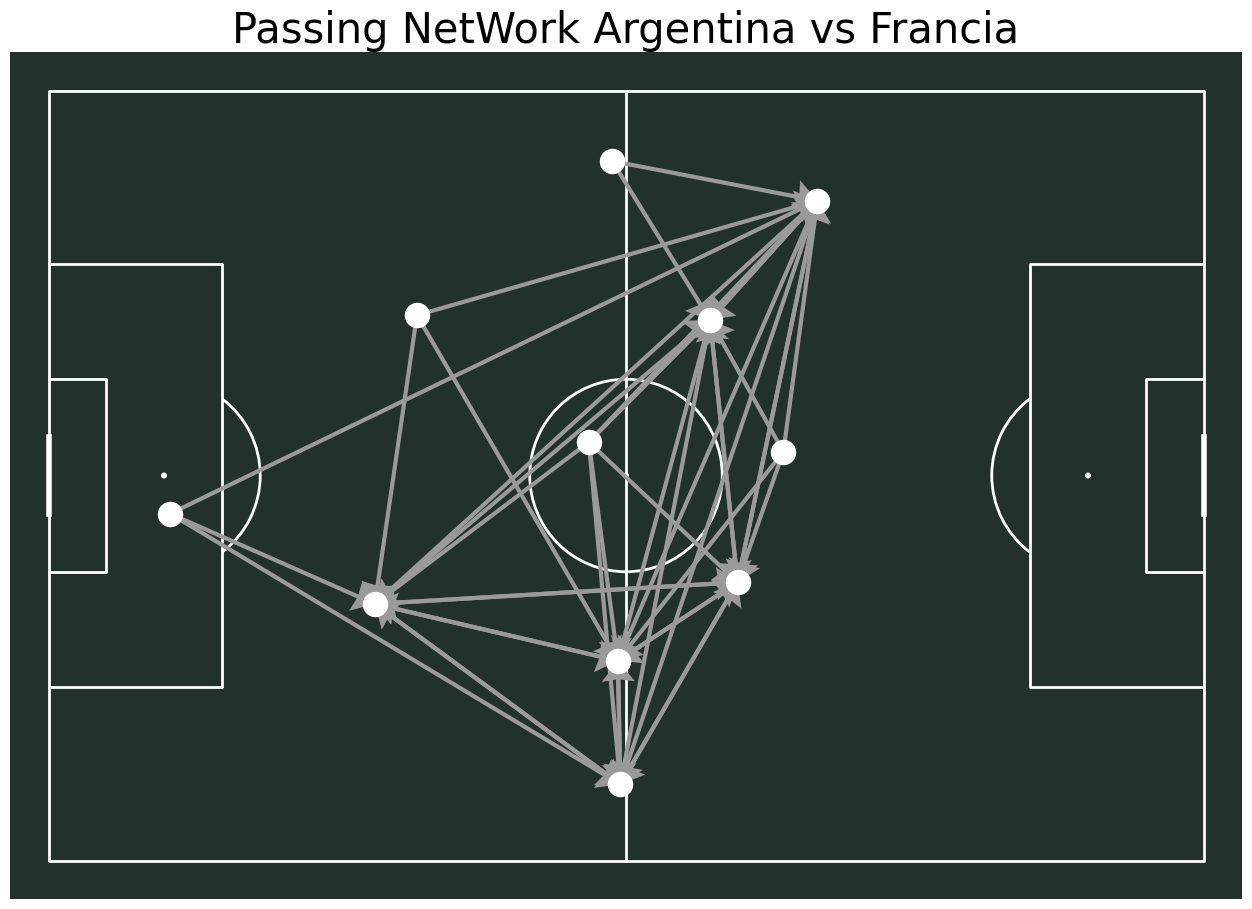

In [171]:
pitch=Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color= 'white', line_zorder=1)

fig, ax=pitch.draw(figsize=(16,11), constrained_layout=False, tight_layout=False)
fig.set_facecolor('white')

arrows=pitch.arrows(pass_between.x_mean,
                    pass_between.y_mean ,
                    pass_between.x_end,
                    pass_between.y_end,
                    width=3,
                    headwidth=8,
                    headlength=5,
                    ax=ax,
                    label='Complete pass',
                    color='#9A9A9A')

nodes=pitch.scatter(average_location.x_mean,
                    average_location.y_mean ,
                    s=300, ax=ax,
                    color='white',
                    zorder=1,label=average_location.count)
ax_title=ax.set_title('Passing NetWork Argentina vs Francia', fontsize=30, color='black')


##Players' passes during the game

In [172]:
# Default settings for heat map chart

white='white'
sbred='#e21017'
darkgrey='#9A9A9A'
cmaplist=[white,darkgrey,sbred]
cmap=LinearSegmentedColormap.from_list('', cmaplist)

In [173]:
#Function that displays a player's heat map
def heatmap_player(player):
  comp=complete[(complete['player']==player)]
  incomp=incomplete[(incomplete['player']==player)]

  #drawing the pitch
  pitch=Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color= 'white', line_zorder=1)

  fig, ax=pitch.draw(figsize=(14,8), constrained_layout=False, tight_layout=False)
  fig.set_facecolor('white')


    # counting the passes in each area of the pitch
  bin_statistic= pitch.bin_statistic(comp.x_end, comp.y_end, statistic='count', bins=(14,8), normalize=True)
  pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

  # color
  ax.legend(facecolor=white, handlelength=5, edgecolor='None', fontsize=20,loc='best')


    #head title
  ax_title=ax.set_title('Heatmap ' f'{player} vs Francia', fontsize=30, color='black')
  plt.show()

  '''
  # Ruta para guardar la imagen en /content/drive/MyDrive/heat_map
  save_path = "/content/drive/MyDrive/Heat_map"
  if not os.path.exists(save_path):
        os.makedirs(save_path)
  # Guardar la imagen con el nombre del jugador en la ubicación especificada
  save_file_path = os.path.join(save_path, f'{player}_heatmap.png')
  plt.savefig(save_file_path, dpi=300, bbox_inches='tight')
  #plt.close()  # Cerrar la figura para liberar memoria
'''



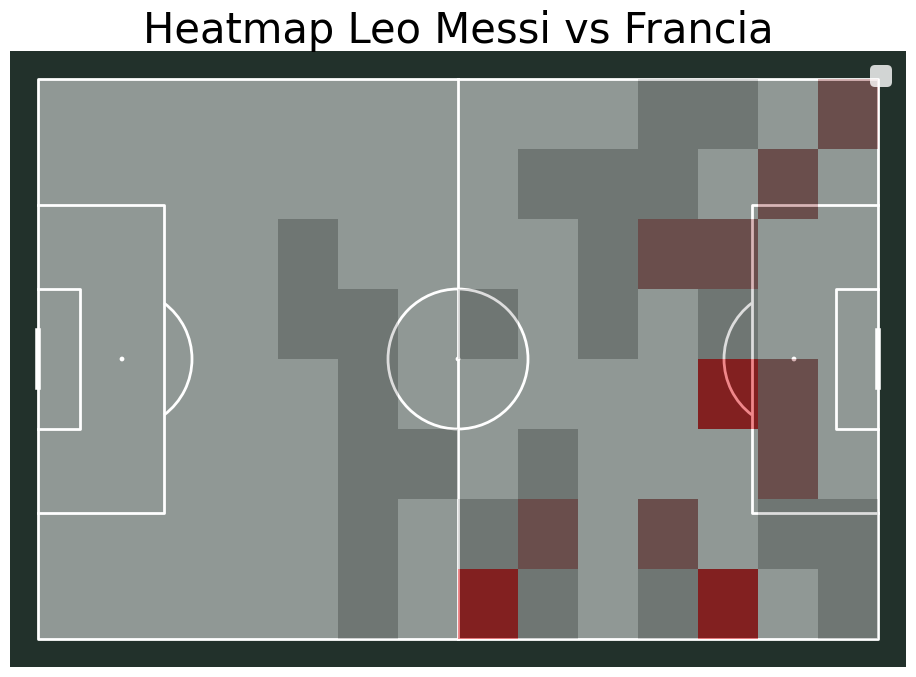

In [174]:
# Call of the funtion heat_map
heatmap_player("Leo Messi")

In [175]:
# If you want to calculate all player heat maps, remove the quotes from the following two lines of code.
'''for player in players:
    heatmap_player(player)'''

'for player in players:\n    heatmap_player(player)'

In [176]:
# Function that displays a player's passes
def pass_player(player):
  comp=complete[(complete['player']==player)]
  incomp=incomplete[(incomplete['player']==player)]

  #drawing the pitch
  pitch=Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color= 'white', line_zorder=1)

  fig, ax=pitch.draw(figsize=(14,8), constrained_layout=False, tight_layout=False)
  fig.set_facecolor('white')
  #arrows
  pitch.arrows(comp.x, comp.y,comp.x_end,comp.y_end, width=3, headwidth=4, headlength=5, ax=ax, label='Complete pass', color='#0083C1')
  pitch.arrows(incomp.x, incomp.y, incomp.x_end, incomp.y_end, width=2, headwidth=2, headlength=5, ax=ax, label='Incomplete pass', color=darkgrey)
  # color
  ax.legend(facecolor=white, handlelength=5, edgecolor='None', fontsize=20,loc='best')
  #head title
  ax_title=ax.set_title('Pass from ' f'{player} vs Francia', fontsize=30, color='black')
  plt.show()



'''
  # Ruta para guardar la imagen en /content/drive/MyDrive/heat_map
  save_path = "/content/drive/MyDrive/passes"
  if not os.path.exists(save_path):
        os.makedirs(save_path)
  # Guardar la imagen con el nombre del jugador en la ubicación especificada
  save_file_path = os.path.join(save_path, f'{player}_passes.png')
  plt.savefig(save_file_path, dpi=300, bbox_inches='tight')
  #plt.close()  # Cerrar la figura para liberar memoria
'''



'\n  # Ruta para guardar la imagen en /content/drive/MyDrive/heat_map\n  save_path = "/content/drive/MyDrive/passes"\n  if not os.path.exists(save_path):\n        os.makedirs(save_path)\n  # Guardar la imagen con el nombre del jugador en la ubicación especificada\n  save_file_path = os.path.join(save_path, f\'{player}_passes.png\')\n  plt.savefig(save_file_path, dpi=300, bbox_inches=\'tight\')\n  #plt.close()  # Cerrar la figura para liberar memoria\n'

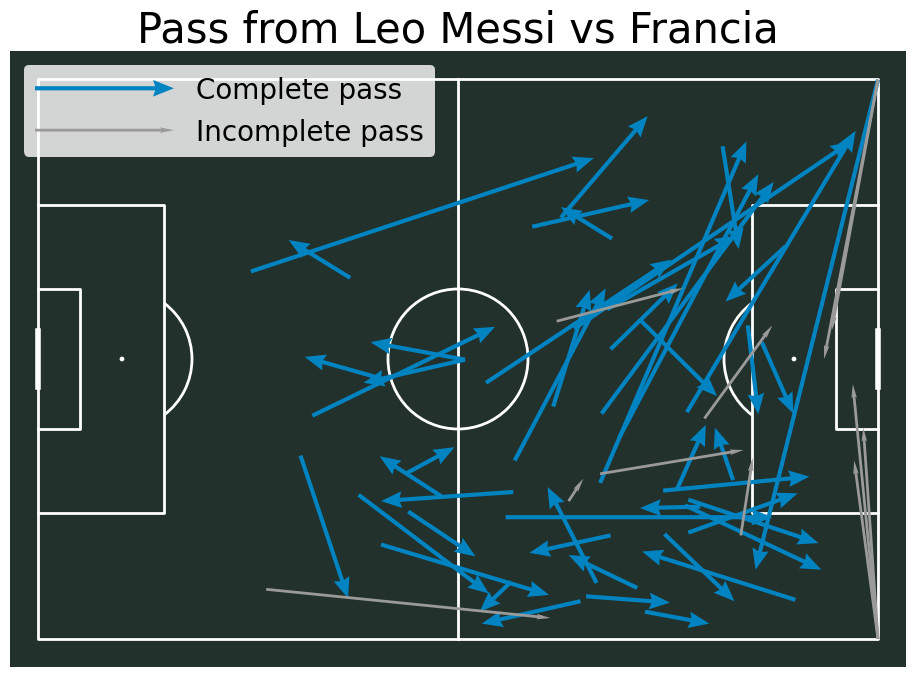

In [177]:
pass_player('Leo Messi')

In [178]:
# If you want to calculate all player passes, remove the quotes from the following two lines of code
'''for player in players:
    pass_player(player)'''

'for player in players:\n    pass_player(player)'

## Freeze frames of Argentina's goals

The term "Freeze Frame of Argentina's goal" refers to a still image or capture of a key moment related to a goal scored by the Argentina national football team in a match. In the context of football, a "freeze frame" is a snapshot of a specific moment in the game.

Argentina scored three goals in the match, the first from a penalty, the second from Di Maria, and the third from Lionel Messi.

### Di Maria's Goal

In [179]:
# The "goals" DataFrame contains the goals of the match.
goals

,player_id,player,location,minute,shot_freeze_frame,shot_outcome,shot_technique,shot_type,team
4210,5503.0,Lionel Andrés Messi Cuccittini,"[108.0, 40.0]",22,NaN,Goal,Normal,Penalty,Argentina
4212,2995.0,Ángel Fabián Di María Hernández,"[111.8, 32.1]",35,"[{'location': [91.0, 50.1], 'player': {'id': 2...",Goal,Normal,Open Play,Argentina
4219,3009.0,Kylian Mbappé Lottin,"[108.0, 40.0]",79,NaN,Goal,Normal,Penalty,France
4220,3009.0,Kylian Mbappé Lottin,"[104.8, 30.1]",80,"[{'location': [117.7, 37.9], 'player': {'id': ...",Goal,Volley,Open Play,France
4232,5503.0,Lionel Andrés Messi Cuccittini,"[116.6, 43.0]",107,"[{'location': [118.3, 43.7], 'player': {'id': ...",Goal,Half Volley,Open Play,Argentina
4234,3009.0,Kylian Mbappé Lottin,"[108.0, 40.0]",117,NaN,Goal,Normal,Penalty,France


In [180]:
# Create a lambda function that extracts the last name from the 'player' column.
get_last_name = lambda nombre: nombre.split()[-2] if nombre != "Ángel Fabián Di María Hernández" else "Di María"

# Apply the lambda function to the 'player' column
goals['last_Name'] = goals['player'].apply(lambda x: get_last_name(x))

goals

,player_id,player,location,minute,shot_freeze_frame,shot_outcome,shot_technique,shot_type,team,last_Name
4210,5503.0,Lionel Andrés Messi Cuccittini,"[108.0, 40.0]",22,NaN,Goal,Normal,Penalty,Argentina,Messi
4212,2995.0,Ángel Fabián Di María Hernández,"[111.8, 32.1]",35,"[{'location': [91.0, 50.1], 'player': {'id': 2...",Goal,Normal,Open Play,Argentina,Di María
4219,3009.0,Kylian Mbappé Lottin,"[108.0, 40.0]",79,NaN,Goal,Normal,Penalty,France,Mbappé
4220,3009.0,Kylian Mbappé Lottin,"[104.8, 30.1]",80,"[{'location': [117.7, 37.9], 'player': {'id': ...",Goal,Volley,Open Play,France,Mbappé
4232,5503.0,Lionel Andrés Messi Cuccittini,"[116.6, 43.0]",107,"[{'location': [118.3, 43.7], 'player': {'id': ...",Goal,Half Volley,Open Play,Argentina,Messi
4234,3009.0,Kylian Mbappé Lottin,"[108.0, 40.0]",117,NaN,Goal,Normal,Penalty,France,Mbappé


In [181]:
# Goals in open play from Argentina
f_goals=goals[(goals['shot_type']=='Open Play')&(goals['team']=='Argentina')].reset_index()
f_goals[['x','y']]=f_goals['location'].apply(pd.Series)

# data of Di Maria's goal
data_shot1=f_goals['shot_freeze_frame'][0]
df_goal_Di_Maria=pd.DataFrame(data_shot1)

#split the players' location into x and y.
df_goal_Di_Maria[['x_p','y_p']]=df_goal_Di_Maria['location'].apply(pd.Series)
df_goal_Di_Maria[['Id_player','name_player']]=df_goal_Di_Maria['player'].apply(pd.Series)


In [182]:
# Create a lambda function that extracts the last name from the 'player' column.
get_last_name_2 = lambda nombre: nombre.split()[-1] if nombre != "Alexis Mac Allister" else "Mac Allister"

# Apply the lambda function to the 'player' column
df_goal_Di_Maria['last_Name'] = df_goal_Di_Maria['name_player'].apply(lambda x: get_last_name_2(x))

df_goal_Di_Maria

,location,player,position,teammate,x_p,y_p,Id_player,name_player,last_Name
0,"[91.0, 50.1]","{'id': 29560, 'name': 'Julián Álvarez'}","{'id': 23, 'name': 'Center Forward'}",True,91.0,50.1,29560,Julián Álvarez,Álvarez
1,"[111.7, 51.7]","{'id': 4445, 'name': 'Jules Koundé'}","{'id': 2, 'name': 'Right Back'}",False,111.7,51.7,4445,Jules Koundé,Koundé
2,"[107.5, 48.1]","{'id': 8519, 'name': 'Dayotchanculle Upamecano'}","{'id': 5, 'name': 'Left Center Back'}",False,107.5,48.1,8519,Dayotchanculle Upamecano,Upamecano
3,"[110.4, 37.7]","{'id': 10481, 'name': 'Aurélien Djani Tchouamé...","{'id': 9, 'name': 'Right Defensive Midfield'}",False,110.4,37.7,10481,Aurélien Djani Tchouaméni,Tchouaméni
4,"[101.6, 48.0]","{'id': 5485, 'name': 'Raphaël Varane'}","{'id': 3, 'name': 'Right Center Back'}",False,101.6,48.0,5485,Raphaël Varane,Varane
5,"[93.8, 59.2]","{'id': 6704, 'name': 'Theo Bernard François He...","{'id': 6, 'name': 'Left Back'}",False,93.8,59.2,6704,Theo Bernard François Hernández,Hernández
6,"[114.6, 35.1]","{'id': 3099, 'name': 'Hugo Lloris'}","{'id': 1, 'name': 'Goalkeeper'}",False,114.6,35.1,3099,Hugo Lloris,Lloris
7,"[109.2, 53.3]","{'id': 27886, 'name': 'Alexis Mac Allister'}","{'id': 15, 'name': 'Left Center Midfield'}",True,109.2,53.3,27886,Alexis Mac Allister,Mac Allister


In [183]:
# Players are filtered by team
df_teammate=df_goal_Di_Maria[df_goal_Di_Maria['teammate']==True]
df_opponent=df_goal_Di_Maria[df_goal_Di_Maria['teammate']==False]


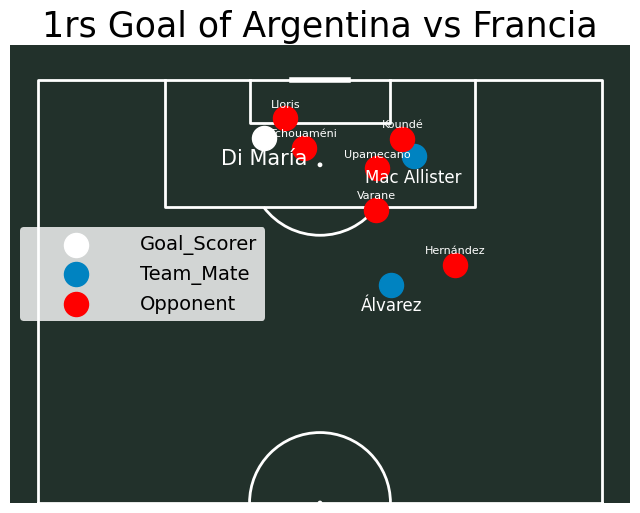

In [184]:
pitch=VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color= 'white', line_zorder=1)

fig, ax=pitch.draw(figsize=(8,10), constrained_layout=False, tight_layout=False, )
fig.set_facecolor('white')
ax.set_title('1rs Goal of Argentina vs Francia', fontsize=25, color='Black')

nodes=pitch.scatter(f_goals.iloc[0].x,
                    f_goals.iloc[0].y,
                    s=300, ax=ax,
                    color='white',
                    zorder=1,label='Goal_Scorer')

nodes=pitch.scatter(df_teammate.x_p,
                    df_teammate.y_p,
                    s=300, ax=ax,
                    color='#0083C1',
                    zorder=1,label='Team_Mate')

nodes=pitch.scatter(df_opponent.x_p,
                    df_opponent.y_p,
                    s=300, ax=ax,
                    color='red',
                    zorder=1,label='Opponent')

ax.annotate(
    f"{f_goals.iloc[0].last_Name}",
    (f_goals.iloc[0].y, f_goals.iloc[0].x-3),
    fontsize=15,
    color='white',
    horizontalalignment='center',
    verticalalignment='center',
)

for index, row in df_teammate.iterrows():
    ax.annotate(
        f"{row.last_Name}",
        (row.y_p, row.x_p - 3),
        fontsize=12,
        color='white',
        horizontalalignment='center',
        verticalalignment='center',
    )

for index, row in df_opponent.iterrows():
    ax.annotate(
        f"{row.last_Name}",
        (row.y_p, row.x_p + 2),
        fontsize=8,
        color='white',
        horizontalalignment='center',
        verticalalignment='center',
    )

ax.set_ylim([60,125])
ax.legend(facecolor=white, handlelength=5, edgecolor='None', fontsize=14,loc='best')



### Leo Messi's Goal

In [185]:
# data of Messi's goal
data_shot1=f_goals['shot_freeze_frame'][1]
df_goal_Messi=pd.DataFrame(data_shot1)

#split the players' location into x and y.
df_goal_Messi[['x_p','y_p']]=df_goal_Messi['location'].apply(pd.Series)
df_goal_Messi[['Id_player','name_player']]=df_goal_Messi['player'].apply(pd.Series)


In [186]:
df_goal_Messi['last_Name'] = df_goal_Messi['name_player'].apply(lambda x: get_last_name_2(x))
df_goal_Messi

,location,player,position,teammate,x_p,y_p,Id_player,name_player,last_Name
0,"[118.3, 43.7]","{'id': 3099, 'name': 'Hugo Lloris'}","{'id': 1, 'name': 'Goalkeeper'}",False,118.3,43.7,3099,Hugo Lloris,Lloris
1,"[103.5, 42.2]","{'id': 11990, 'name': 'Youssouf Fofana'}","{'id': 11, 'name': 'Left Defensive Midfield'}",False,103.5,42.2,11990,Youssouf Fofana,Fofana
2,"[108.9, 48.5]","{'id': 24778, 'name': 'Eduardo Camavinga'}","{'id': 6, 'name': 'Left Back'}",False,108.9,48.5,24778,Eduardo Camavinga,Camavinga
3,"[109.9, 39.7]","{'id': 10481, 'name': 'Aurélien Djani Tchouamé...","{'id': 9, 'name': 'Right Defensive Midfield'}",False,109.9,39.7,10481,Aurélien Djani Tchouaméni,Tchouaméni
4,"[112.0, 42.1]","{'id': 5485, 'name': 'Raphaël Varane'}","{'id': 3, 'name': 'Right Center Back'}",False,112.0,42.1,5485,Raphaël Varane,Varane
5,"[119.0, 50.8]","{'id': 8519, 'name': 'Dayotchanculle Upamecano'}","{'id': 5, 'name': 'Left Center Back'}",False,119.0,50.8,8519,Dayotchanculle Upamecano,Upamecano
6,"[120.0, 40.6]","{'id': 4445, 'name': 'Jules Koundé'}","{'id': 2, 'name': 'Right Back'}",False,120.0,40.6,4445,Jules Koundé,Koundé
7,"[93.5, 28.4]","{'id': 19597, 'name': 'Marcos Javier Acuña'}","{'id': 21, 'name': 'Left Wing'}",True,93.5,28.4,19597,Marcos Javier Acuña,Acuña
8,"[115.5, 34.6]","{'id': 38718, 'name': 'Enzo Fernandez'}","{'id': 13, 'name': 'Right Center Midfield'}",True,115.5,34.6,38718,Enzo Fernandez,Fernandez
9,"[115.6, 50.8]","{'id': 11456, 'name': 'Lautaro Javier Martínez'}","{'id': 23, 'name': 'Center Forward'}",True,115.6,50.8,11456,Lautaro Javier Martínez,Martínez


In [187]:
# Players are filtered by team
df_teammate=df_goal_Messi[df_goal_Messi['teammate']==True]
df_opponent=df_goal_Messi[df_goal_Messi['teammate']==False]

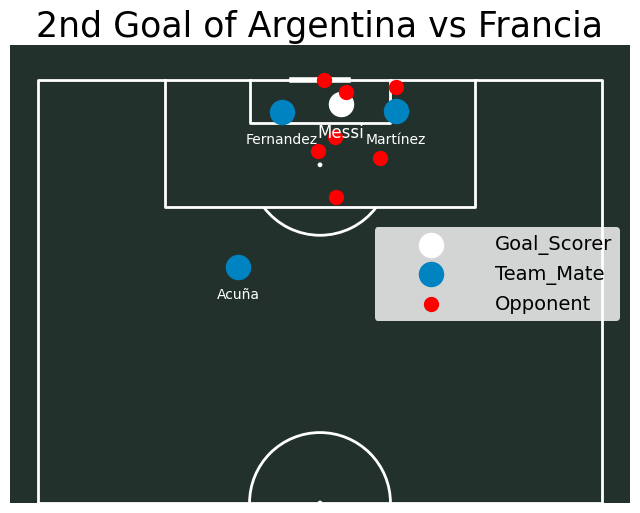

In [188]:
pitch=VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color= 'white', line_zorder=1)

fig, ax=pitch.draw(figsize=(8,10), constrained_layout=False, tight_layout=False, )
fig.set_facecolor('white')
ax.set_title('2nd Goal of Argentina vs Francia', fontsize=25, color='Black')

nodes=pitch.scatter(f_goals.iloc[1].x,
                    f_goals.iloc[1].y,
                    s=300, ax=ax,
                    color='white',
                    zorder=1,label='Goal_Scorer')

nodes=pitch.scatter(df_teammate.x_p,
                    df_teammate.y_p,
                    s=300, ax=ax,
                    color='#0083C1',
                    zorder=1,label='Team_Mate')

nodes=pitch.scatter(df_opponent.x_p,
                    df_opponent.y_p,
                    s=100, ax=ax,
                    color='red',
                    zorder=1,label='Opponent')

ax.annotate(
    f"{f_goals.iloc[1].last_Name}",
    (f_goals.iloc[1].y, f_goals.iloc[1].x-4),
    fontsize=12,
    color='white',
    horizontalalignment='center',
    verticalalignment='center',
)

for index, row in df_teammate.iterrows():
    ax.annotate(
        f"{row.last_Name}",
        (row.y_p, row.x_p -4),
        fontsize=10,
        color='white',
        horizontalalignment='center',
        verticalalignment='center',
    )

ax.set_ylim([60,125])
ax.legend(facecolor=white, handlelength=5, edgecolor='None', fontsize=14,loc='best')



## Metrics for Selecting the Best Player
The metric consists of four key components: completed passes, incomplete passes, assists, and forward passes ending within 3/4 of the field. These elements are used to evaluate a player's contribution in terms of passes and assists during the match between Argentina and France in the Qatar final.

In [189]:
type_pass=complete[['player','pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_deflected','pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       'pass_outcome', 'pass_outswinging', 'pass_recipient',
       'pass_shot_assist', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'x', 'y', 'x_end',
       'y_end']]

In [190]:
# Goal assists from Argentine players during the match
assist=type_pass[type_pass['pass_goal_assist']==True]
assist

,player,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_deflected,pass_goal_assist,pass_height,pass_inswinging,...,pass_recipient,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,x,y,x_end,y_end
367,Mac Allister,NaN,-1.069301,ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,Right Foot,NaN,NaN,True,Ground Pass,NaN,...,Ángel Fabián Di María Hernández,NaN,NaN,NaN,NaN,NaN,99.3,54.9,111.8,32.1


In [191]:
# Create a 'assist' column in the 'df_data' and initialize it with 0.
df_data_pass['assist'] = 0

# Merge the DataFrames based on the 'player' column
df_metric = df_data_pass.merge(assist, on="player", how="left")

# Replace the 'assist' values with 1 where there are matches.
df_metric["assist"] = df_metric["assist"].fillna(0).astype(int)
df_metric


,player,Total,Complete,Incomplete,player_id,total_pass,assist,pass_aerial_won,pass_angle,pass_assisted_shot_id,...,pass_recipient,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,x,y,x_end,y_end
0,Acuña,28,19,9.0,19597.0,28,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cuti Romero,71,60,11.0,20572.0,71,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,De Paul,68,57,11.0,7797.0,68,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Di María,29,25,4.0,2995.0,29,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dibu,33,18,15.0,6909.0,33,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dybala,3,1,2.0,5743.0,3,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Enzo,94,79,15.0,38718.0,94,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lautaro,7,5,2.0,11456.0,7,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Leo Messi,60,49,11.0,5503.0,60,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mac Allister,52,45,7.0,27886.0,52,0,NaN,-1.069301,ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,...,Ángel Fabián Di María Hernández,NaN,NaN,NaN,NaN,NaN,99.3,54.9,111.8,32.1


In [192]:
df_metric=df_metric[['player','Total','Complete','Incomplete',	'player_id', 'pass_goal_assist'	]]
# Replace NaN with 0 in the 'pass_goal_assist' column.
df_metric["pass_goal_assist"].fillna(0, inplace=True)

# Replace 'True' with 1 in the 'pass_goal_assist' column.
df_metric["pass_goal_assist"] = df_metric["pass_goal_assist"].astype(int)
df_metric

<ipython-input-192-af58ee6283e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["pass_goal_assist"].fillna(0, inplace=True)
<ipython-input-192-af58ee6283e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["pass_goal_assist"] = df_metric["pass_goal_assist"].astype(int)


,player,Total,Complete,Incomplete,player_id,pass_goal_assist
0,Acuña,28,19,9.0,19597.0,0
1,Cuti Romero,71,60,11.0,20572.0,0
2,De Paul,68,57,11.0,7797.0,0
3,Di María,29,25,4.0,2995.0,0
4,Dibu,33,18,15.0,6909.0,0
5,Dybala,3,1,2.0,5743.0,0
6,Enzo,94,79,15.0,38718.0,0
7,Lautaro,7,5,2.0,11456.0,0
8,Leo Messi,60,49,11.0,5503.0,0
9,Mac Allister,52,45,7.0,27886.0,1


### Completed passes in attack


In [193]:
# Filter to obtain passes made in Argentina's attacking areas
attacking_passes=complete[(complete['x']<complete['x_end'])&(complete['x_end']>90)]
attacking_passes[['player','x', 'x_end', 'y']]

,player,x,x_end,y
36,Leo Messi,76.6,116.2,35.7
38,De Paul,93.1,100.4,53.2
55,Tagliafico,82.4,96.1,7.4
56,Mac Allister,96.1,106.4,14.3
104,Mac Allister,75.8,94.2,26.9
...,...,...,...,...
1231,Enzo,63.1,94.2,62.8
1238,Enzo,79.2,94.6,43.6
1241,Enzo,83.2,96.3,80.0
1269,Leo Messi,66.8,104.9,62.6


In [194]:
# Obtaining the attacking passes grouped by player
count_passes_a = attacking_passes.groupby(['player'])['player'].count().to_frame()
count_passes_a.rename(columns={'player': 'pass_A'}, inplace=True)
count_passes_a.reset_index(inplace=True)

count_passes_a


,player,pass_A
0,Acuña,5
1,De Paul,9
2,Di María,3
3,Enzo,9
4,Lautaro,1
5,Leo Messi,21
6,Mac Allister,10
7,Montiel,2
8,N Molina,4
9,Paredes,2


In [195]:
# Combining the data obtained earlier.
df_metric = df_metric.merge(count_passes_a, on="player", how="left")
df_metric["pass_A"].fillna(0, inplace=True)


In [196]:
df_metric

,player,Total,Complete,Incomplete,player_id,pass_goal_assist,pass_A
0,Acuña,28,19,9.0,19597.0,0,5.0
1,Cuti Romero,71,60,11.0,20572.0,0,0.0
2,De Paul,68,57,11.0,7797.0,0,9.0
3,Di María,29,25,4.0,2995.0,0,3.0
4,Dibu,33,18,15.0,6909.0,0,0.0
5,Dybala,3,1,2.0,5743.0,0,0.0
6,Enzo,94,79,15.0,38718.0,0,9.0
7,Lautaro,7,5,2.0,11456.0,0,1.0
8,Leo Messi,60,49,11.0,5503.0,0,21.0
9,Mac Allister,52,45,7.0,27886.0,1,10.0


The 'Score' column reflects a metric that evaluates players' performance based on completed passes, incomplete passes, assists, and forward passes from 3/4 of the field, helping to identify the key player in terms of ball distribution and creativity in the game.

In [197]:
df_metric['Score_MVP'] = (df_metric['Complete'] * 0.40) + (df_metric['Incomplete'] * -0.20) + (df_metric['pass_goal_assist'] * 0.30) + (df_metric['pass_A'] * 0.10)



In [198]:
df_metric.sort_values('Score_MVP', ascending=False)

,player,Total,Complete,Incomplete,player_id,pass_goal_assist,pass_A,Score_MVP
6,Enzo,94,79,15.0,38718.0,0,9.0,29.5
12,Otamendi,75,69,6.0,3090.0,0,0.0,26.4
1,Cuti Romero,71,60,11.0,20572.0,0,0.0,21.8
2,De Paul,68,57,11.0,7797.0,0,9.0,21.5
8,Leo Messi,60,49,11.0,5503.0,0,21.0,19.5
9,Mac Allister,52,45,7.0,27886.0,1,10.0,17.9
15,Tagliafico,56,44,12.0,5507.0,0,6.0,15.8
11,N Molina,56,39,17.0,29201.0,0,4.0,12.6
16,Álvarez,32,26,6.0,29560.0,0,4.0,9.6
3,Di María,29,25,4.0,2995.0,0,3.0,9.5


## Descriptive statistics

### Measures of central tendency and Measures of dispersion

Mean (Average), Median and Mode.

Range - The difference between the maximum and minimum value in a dataset.

Standard deviation - A measure of how much values deviate from the mean.

Variance - The square of the standard deviation.

In [200]:
passes_Arg_total

,player,Total,Complete,Incomplete
0,Acuña,28,19,9.0
1,Cuti Romero,71,60,11.0
2,De Paul,68,57,11.0
3,Di María,29,25,4.0
4,Dibu,33,18,15.0
5,Dybala,3,1,2.0
6,Enzo,94,79,15.0
7,Lautaro,7,5,2.0
8,Leo Messi,60,49,11.0
9,Mac Allister,52,45,7.0


In [201]:
# Defining a function to calculate descriptive statistics
def calculate_statistics(data, column_name):
    # Calculating measures of central tendency.
    mean_value = data.mean()
    median_value = data.median()
    mode_value = data.mode().values[0]

    # Calculating measures of dispersion.
    range_value = data.max() - data.min()
    std_deviation = data.std()
    variance = data.var()

    # Creating a histogram.
    plt.figure(figsize=(6, 3))
    plt.hist(data, bins=20, color='#0404B4', alpha=0.7, histtype='stepfilled', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Creating a DataFrame with the statistics.
    statistics_df = pd.DataFrame({
        'Column Name': [column_name],
        'Mean': [mean_value],
        'Median': [median_value],
        'Mode': [mode_value],
        'Range': [range_value],
        'Standard Deviation': [std_deviation],
        'Variance': [variance]
    })

    return statistics_df


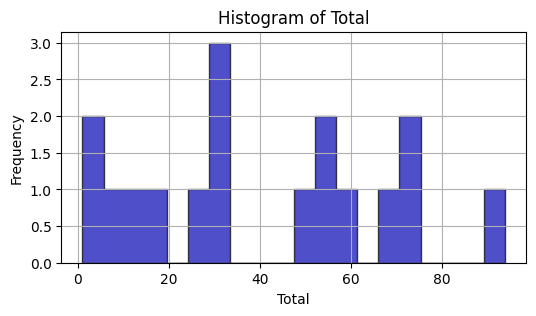

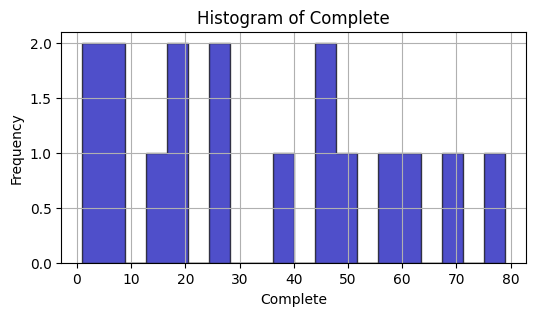

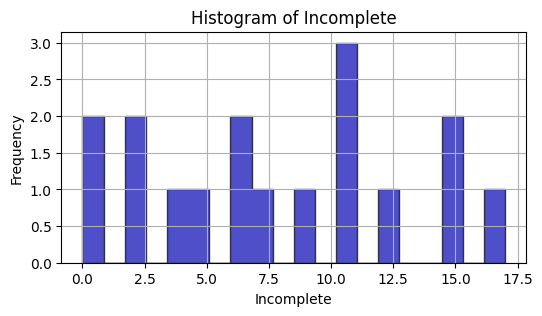

In [202]:
# Storing resulting DataFrames in a list.
data_frames = []
data_frames.append(calculate_statistics(passes_Arg_total["Total"], "Total"))
data_frames.append(calculate_statistics(passes_Arg_total["Complete"], "Complete"))
data_frames.append(calculate_statistics(passes_Arg_total["Incomplete"], "Incomplete"))



In [205]:
# Concatenating the DataFrames into a single table
descriptive_data = pd.concat(data_frames, ignore_index=True)
descriptive_data

,Column Name,Mean,Median,Mode,Range,Standard Deviation,Variance
0,Total,40.764706,33.0,56.0,93.0,28.110339,790.191176
1,Complete,32.941176,26.0,1.0,78.0,24.480785,599.308824
2,Incomplete,7.823529,7.0,11.0,17.0,5.341293,28.529412


# Load (L)

The "Load" stage, or loading phase, is the final step in the ETL (Extract, Transform, Load) process, where processed data is stored in a target system. In this stage, the results of transformations performed in the "Transform" stage are taken and loaded in the desired format, which could be a database, a data warehouse, or files such as CSV.

In [206]:
#argentiana_matches.to_csv('/content/drive/MyDrive/Data_porfolio_football/argentiana_matches.csv')
#data_team.to_csv('/content/drive/MyDrive/Data_porfolio_football/data_team_players.csv')
#cards.to_csv('/content/drive/MyDrive/Data_porfolio_football/cards.csv')
#goals_total.to_csv('/content/drive/MyDrive/Data_porfolio_football/goals_total.csv')
#descriptive_data.to_csv('/content/drive/MyDrive/Data_porfolio_football/descriptive_data.csv')